In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener  # for Wiener filter

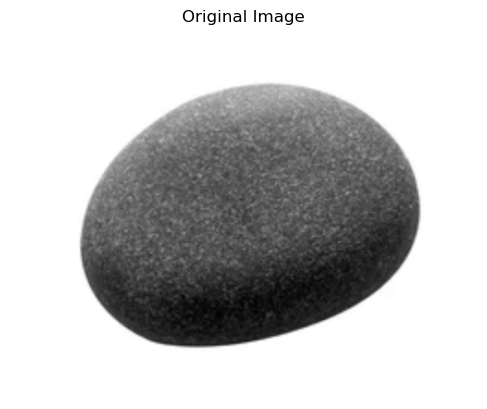

In [3]:
# Read grayscale image
img = cv2.imread(r'C:\Users\LENOVO\OneDrive\Desktop\miranda\img.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

Add Salt and Pepper Noise

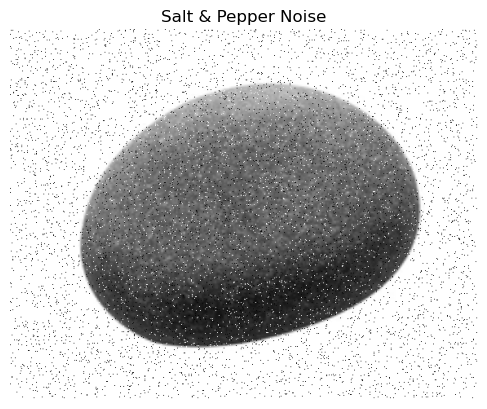

In [4]:
def add_salt_pepper_noise(image, prob=0.02):
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    # Salt (255)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper (0)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

sp_noisy = add_salt_pepper_noise(img, 0.05)

plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')
plt.show()


Add Gaussian Noise

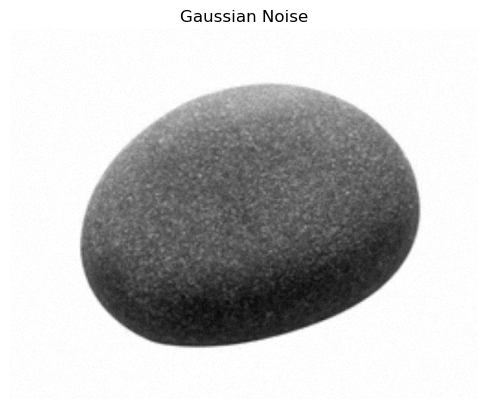

In [5]:
def add_gaussian_noise(image, mean=0, var=20):
    sigma = np.sqrt(var)
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

gauss_noisy = add_gaussian_noise(img)

plt.imshow(gauss_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')
plt.show()


Remove Salt & Pepper Noise — Median Filter

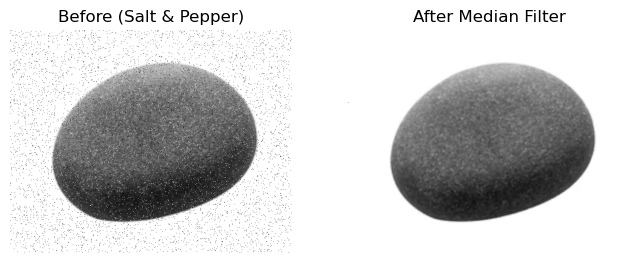

In [6]:
median_filtered = cv2.medianBlur(sp_noisy, 3)  # 3×3 kernel

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Before (Salt & Pepper)")
plt.imshow(sp_noisy, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Median Filter")
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.show()


(b) Minimize Gaussian Noise — Gaussian Filter

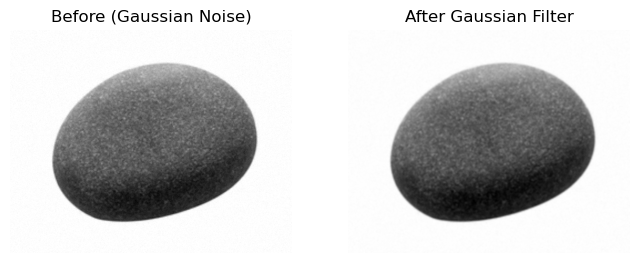

In [7]:
gaussian_filtered = cv2.GaussianBlur(gauss_noisy, (5,5), 0)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Before (Gaussian Noise)")
plt.imshow(gauss_noisy, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Gaussian Filter")
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')
plt.show()


Median Filter vs Wiener Filter Comparison